# Decision Tree

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [32]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import violinplot
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

In [17]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir
from src.utils.metrics import display_and_plot_all_metrics

## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [5]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_final.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_final.csv


In [6]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [7]:
df_wines.sample(10)

,PC1,PC2,PC5,PC6,PC7,quality_low,style
1779,0.455117,0.213341,-0.055466,0.245070,0.445022,1,1
204,-0.106674,0.432787,0.304103,-0.021516,-0.117342,0,2
2124,0.794106,0.069344,-0.140391,-0.071473,0.050244,0,1
1088,-0.225793,0.080751,-0.222051,-0.312526,-0.135304,0,1
3564,-0.452719,-0.513060,-0.174341,-0.004495,-0.241751,0,1
3775,-0.052526,-0.140971,-0.548751,0.469813,-0.050266,0,1
3108,-0.482641,-0.312698,-0.025397,0.277637,0.246549,0,1
4306,-0.535672,0.155056,-0.063183,0.239987,0.160164,0,1
1414,0.664729,0.233756,-0.112951,-0.018711,-0.080371,0,1
3134,-0.020596,-0.186728,0.057071,-0.171960,0.091269,0,1


# Preparamos los datos

In [8]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_low"])
y = df_wines.quality_low #Defino el Target

In [9]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [10]:
X_train.shape, X_test.shape

((3509, 6), (1504, 6))

# Decision  tree

In [11]:
tree = DecisionTreeClassifier(max_depth=3, random_state = 42) #Creamos el modelo

In [12]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.74,0.7,0.59,0.42,0.32


### Grafico de confusion matrix: 

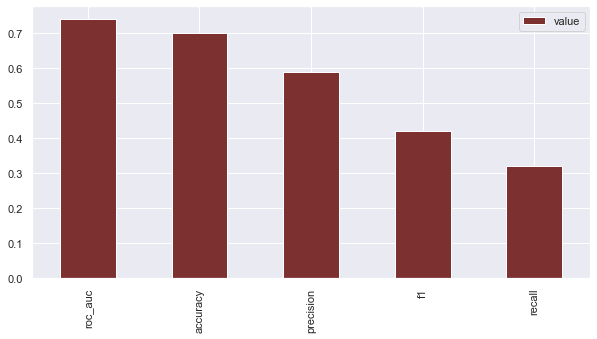

<Figure size 720x720 with 0 Axes>

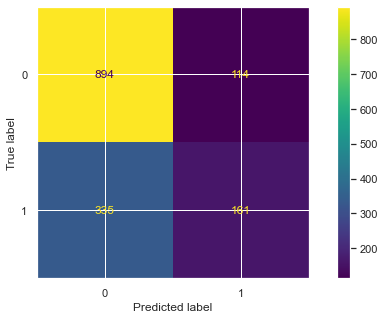

### Grafico de roc: 

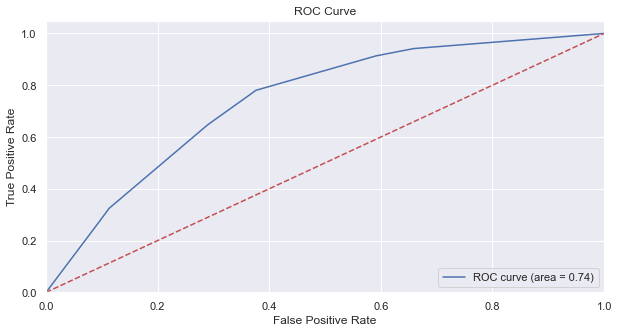

In [18]:
display_and_plot_all_metrics(tree,X_test,y_test,y_test_pred)

En comparación al de Knn este algoritmo nos da peores indicadores, veamos si lo podemos mejorar.

## Importancia de las variables

c:\Users\cvigo\.conda\envs\vinos_coderhouse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


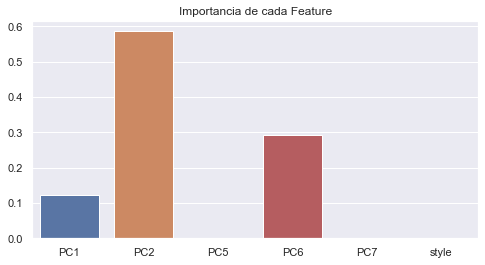

In [15]:
plt.figure(figsize=(8,4))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Para el este algoritmo la importancia se centra en las variables:
- PC1
- PC2
- PC6

In [19]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir y las variables de poca importancia
X = df_wines.drop(columns=["quality_low","PC5","PC7","PC7","style"])
y = df_wines.quality_low #Defino el Target

In [20]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [21]:
X_train.shape, X_test.shape

((3509, 3), (1504, 3))

# Hypertuning de Parámetros

In [39]:
# Hyperparametros

hyperparameters={
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [40]:
# creamos el modelo
tree_2 = DecisionTreeClassifier()

In [42]:
clf =GridSearchCV(tree_2,param_grid=hyperparameters,scoring="accuracy")


In [43]:
#Entrenamos el modelo 
best_model = clf.fit(X_train, y_train)

In [44]:
y_test_pred = clf.predict(X_test)

In [45]:
# Mostramos los mejores parametros
best_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [49]:
best_model.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.77,0.72,0.58,0.57,0.56


### Grafico de confusion matrix: 

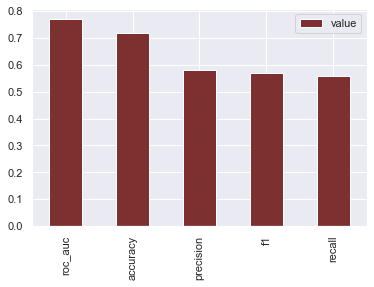

<Figure size 720x720 with 0 Axes>

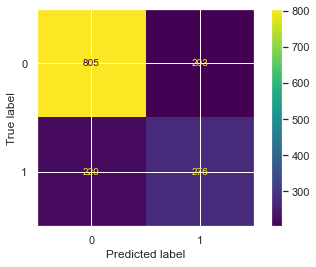

### Grafico de roc: 

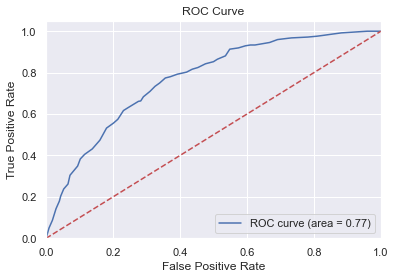

In [46]:
display_and_plot_all_metrics(clf,X_test,y_test,y_test_pred)

## Conclusión

Comparamos los resultados de ambos modelos:
- Subieron los errores de Tipo1 de 114 a 203
- Bajaron los errores de Tipo2 de 335 a 220
- Subieron todas las metricas, principalmente la de f1 y recall, con excepción de precision que bajó de 0.59 a 0.58.

En este caso si podemos ver que el algoritmo de Decision Tree mejora considerablemente con algunas metricas, aunque no tan es tan determinante con el accuracy.